In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [59]:
train_df_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [60]:
test_df_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [47]:
train_df_iris.species

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [63]:
X_train = train_df_iris.drop(['Unnamed: 0', 'species'], axis=1)

In [45]:
X_train.shape

(100, 4)

In [61]:
y_train = train_df_iris.species

In [72]:
y_train

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [64]:
X_test = test_df_iris.drop(['Unnamed: 0', 'species'], axis=1)

In [65]:
y_test = test_df_iris.species

In [98]:
score_data = pd.DataFrame()

In [99]:
max_depth_values = range(1, 100)

In [100]:
rs = np.random.seed(0)

In [101]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_scores_data = pd.DataFrame({'max_depth' : [max_depth],
                                     'train_score' : [train_score],
                                     'test_score' : [test_score]})
    score_data = score_data.append(temp_scores_data)

In [102]:
score_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


In [103]:
score_data_long = pd.melt(score_data, id_vars='max_depth', value_vars=['train_score', 'test_score'], var_name='set_type',
                          value_name='score')

In [104]:
score_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


In [105]:
sns.set(rc={'figure.figsize' : (15, 10)})

<AxesSubplot:xlabel='max_depth', ylabel='score'>

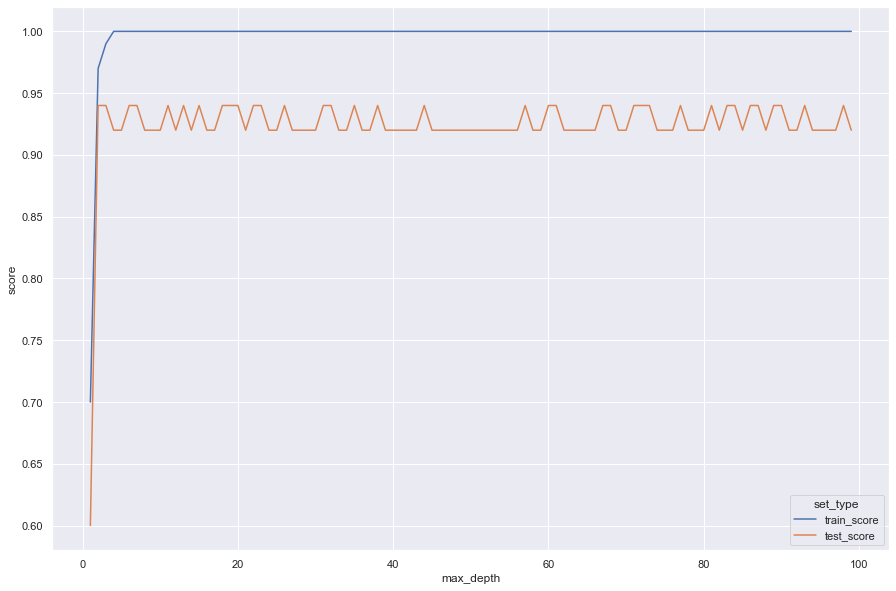

In [106]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)